<center><img src="./images/logo_fmkn.png" width=300 style="display: inline-block;"></center> 

## Машинное обучение
### Семинар 10. Введение в нейронные сети

<br />
<br />
18 ноября 2021

Загрузим датасет MNIST — базу данных рукописных цифр

In [1]:
import tensorflow.keras as keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
import matplotlib.pyplot as plt
import matplotlib

In [4]:
fig, gs = plt.figure(figsize=(18, 8)), matplotlib.gridspec.GridSpec(2, 3)

for i in range(6):
    plot = fig.add_subplot(gs[i])
    plot.imshow(x_train[i], , cmap='gray')

plt.show()

SyntaxError: invalid syntax (<ipython-input-4-14a6890edfb9>, line 5)

In [5]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

In [6]:
y_train[3:6]

array([1, 9, 2], dtype=uint8)

Для построения нейронной сети воспользуемся библиотекой keras.
Это высокоуровневая надстройка над tensorflow. Большим ее преимуществом является интерфейс, совместимый с sklearn.

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Для того, чтобы градиенты были более стабильными, поделим входные данные на 255 (чтобы они были из диапазона [0,1]). И запустим обучение.

In [8]:
model.fit(x_train.astype("float32") / 255, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6302 - accuracy: 0.8448
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3298 - accuracy: 0.9085
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2808 - accuracy: 0.9211
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2496 - accuracy: 0.9299
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2257 - accuracy: 0.9363
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2064 - accuracy: 0.9422
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1901 - accuracy: 0.9462
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1766 - accuracy: 0.9503
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1647 - accuracy: 0.9540
Epoch 10/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.154

In [9]:
import numpy as np

np.argmax(model.predict(x_test.astype("float32") / 255), axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(np.argmax(model.predict(x_test.astype("float32") / 255), axis=1), y_test)

0.9687

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


<div class="alert alert-info">
<b>Вопрос 1:</b> Откуда все эти числа и почему такие?
</div>

In [1]:
x = 28**2
y = 256
z = 10
w1 = 784 * 256 + 256
w2 = 256 * 10 + 10

In [13]:
model.fit(x_train.astype("float32") / 255, y_train, epochs=100, validation_data=(x_test.astype("float32") / 255, y_test))

Epoch 1/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0918 - accuracy: 0.9753 - val_loss: 0.1016 - val_accuracy: 0.9701
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0884 - accuracy: 0.9760 - val_loss: 0.0986 - val_accuracy: 0.9712
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0855 - accuracy: 0.9770 - val_loss: 0.0977 - val_accuracy: 0.9713
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0825 - accuracy: 0.9777 - val_loss: 0.0949 - val_accuracy: 0.9721
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0798 - accuracy: 0.9786 - val_loss: 0.0935 - val_accuracy: 0.9724
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0772 - accuracy: 0.9792 - val_loss: 0.0910 - val_accuracy: 0.9728
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0748 - accuracy: 0.9799 - val_loss: 0.0905 - val_ac

In [14]:
accuracy_score(np.argmax(model.predict(x_test.astype("float32") / 255), axis=1), y_test)

0.9804

Посмотрим ещё один датасет. 

Fashion-MNIST — это набор изображений статей магазина Zalando, состоящий из обучающего набора из 60 000 объектов и тестового набора из 10 000 объектов. 

Каждый объект — изображение в оттенках серого 28x28, связанное с меткой из 10 классов.

In [15]:
fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

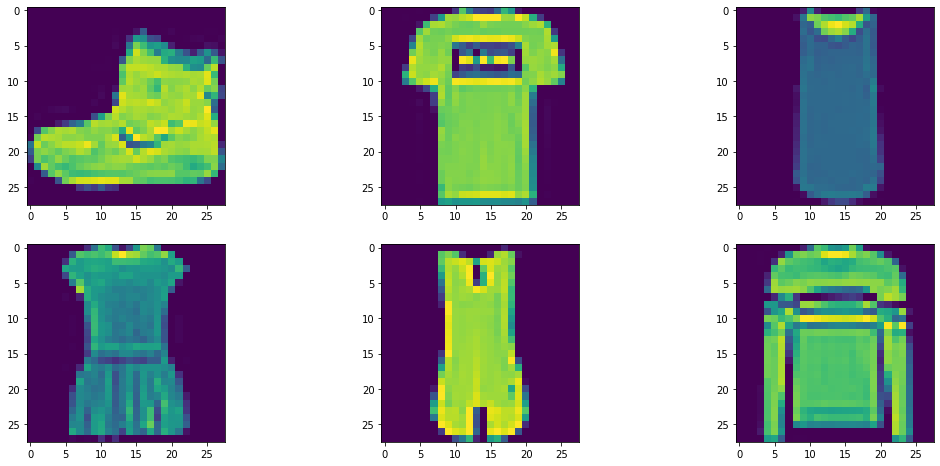

In [16]:
fig, gs = plt.figure(figsize=(18, 8)), matplotlib.gridspec.GridSpec(2, 3)

for i in range(6):
    plot = fig.add_subplot(gs[i])
    plot.imshow(x_train[i])

plt.show()

In [17]:
y_train[:3]

array([9, 0, 0], dtype=uint8)

In [18]:
y_train[3:6]

array([3, 0, 2], dtype=uint8)

Модель в точности та же.

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
from sklearn.model_selection import train_test_split

_, x_split, _, y_split = train_test_split(x_train, y_train, test_size=0.001, random_state=42)

In [21]:
model.fit(x_split.astype("float32") / 255, y_split, epochs=500, validation_data=(x_test.astype("float32") / 255, y_test))

Epoch 1/500
2/2 [==============================] - 1s 670ms/step - loss: 2.3810 - accuracy: 0.1333 - val_loss: 2.2456 - val_accuracy: 0.1621
Epoch 2/500
2/2 [==============================] - 1s 562ms/step - loss: 2.2086 - accuracy: 0.1667 - val_loss: 2.1723 - val_accuracy: 0.1873
Epoch 3/500
2/2 [==============================] - 1s 683ms/step - loss: 2.0739 - accuracy: 0.1833 - val_loss: 2.1186 - val_accuracy: 0.2339
Epoch 4/500
2/2 [==============================] - 1s 608ms/step - loss: 1.9699 - accuracy: 0.3000 - val_loss: 2.0737 - val_accuracy: 0.2516
Epoch 5/500
2/2 [==============================] - 1s 641ms/step - loss: 1.8922 - accuracy: 0.4167 - val_loss: 2.0392 - val_accuracy: 0.2820
Epoch 6/500
2/2 [==============================] - 1s 665ms/step - loss: 1.8219 - accuracy: 0.5000 - val_loss: 2.0074 - val_accuracy: 0.3131
Epoch 7/500
2/2 [==============================] - 1s 676ms/step - loss: 1.7523 - accuracy: 0.5833 - val_loss: 1.9728 - val_accuracy: 0.3405
Epoch 8/500
2

Epoch 59/500
2/2 [==============================] - 1s 1s/step - loss: 0.7367 - accuracy: 0.8500 - val_loss: 1.2664 - val_accuracy: 0.5686
Epoch 60/500
2/2 [==============================] - 1s 925ms/step - loss: 0.7263 - accuracy: 0.8500 - val_loss: 1.2610 - val_accuracy: 0.5704
Epoch 61/500
2/2 [==============================] - 1s 862ms/step - loss: 0.7149 - accuracy: 0.8500 - val_loss: 1.2512 - val_accuracy: 0.5742
Epoch 62/500
2/2 [==============================] - 1s 885ms/step - loss: 0.7097 - accuracy: 0.8500 - val_loss: 1.2405 - val_accuracy: 0.5797
Epoch 63/500
2/2 [==============================] - 1s 742ms/step - loss: 0.6997 - accuracy: 0.8500 - val_loss: 1.2357 - val_accuracy: 0.5823
Epoch 64/500
2/2 [==============================] - 1s 613ms/step - loss: 0.6947 - accuracy: 0.8500 - val_loss: 1.2332 - val_accuracy: 0.5822
Epoch 65/500
2/2 [==============================] - 1s 706ms/step - loss: 0.6935 - accuracy: 0.8500 - val_loss: 1.2353 - val_accuracy: 0.5777
Epoch 66/

2/2 [==============================] - 1s 500ms/step - loss: 0.3117 - accuracy: 0.9500 - val_loss: 1.0064 - val_accuracy: 0.6447
Epoch 174/500
2/2 [==============================] - 1s 514ms/step - loss: 0.3094 - accuracy: 0.9500 - val_loss: 1.0063 - val_accuracy: 0.6437
Epoch 175/500
2/2 [==============================] - 1s 686ms/step - loss: 0.3082 - accuracy: 0.9667 - val_loss: 1.0064 - val_accuracy: 0.6432
Epoch 176/500
2/2 [==============================] - 1s 606ms/step - loss: 0.3077 - accuracy: 0.9667 - val_loss: 1.0025 - val_accuracy: 0.6474
Epoch 177/500
2/2 [==============================] - 1s 588ms/step - loss: 0.3037 - accuracy: 0.9667 - val_loss: 1.0015 - val_accuracy: 0.6460
Epoch 178/500
2/2 [==============================] - 1s 625ms/step - loss: 0.3020 - accuracy: 0.9667 - val_loss: 1.0004 - val_accuracy: 0.6460
Epoch 179/500
2/2 [==============================] - 1s 632ms/step - loss: 0.3035 - accuracy: 0.9667 - val_loss: 1.0014 - val_accuracy: 0.6443
Epoch 180/500

2/2 [==============================] - 1s 777ms/step - loss: 0.1755 - accuracy: 1.0000 - val_loss: 0.9650 - val_accuracy: 0.6600
Epoch 288/500
2/2 [==============================] - 1s 598ms/step - loss: 0.1743 - accuracy: 1.0000 - val_loss: 0.9643 - val_accuracy: 0.6604
Epoch 289/500
2/2 [==============================] - 1s 527ms/step - loss: 0.1740 - accuracy: 1.0000 - val_loss: 0.9652 - val_accuracy: 0.6602
Epoch 290/500
2/2 [==============================] - 1s 520ms/step - loss: 0.1747 - accuracy: 1.0000 - val_loss: 0.9633 - val_accuracy: 0.6605
Epoch 291/500
2/2 [==============================] - 0s 449ms/step - loss: 0.1725 - accuracy: 1.0000 - val_loss: 0.9652 - val_accuracy: 0.6604
Epoch 292/500
2/2 [==============================] - 0s 437ms/step - loss: 0.1716 - accuracy: 1.0000 - val_loss: 0.9660 - val_accuracy: 0.6600
Epoch 293/500
2/2 [==============================] - 0s 456ms/step - loss: 0.1710 - accuracy: 1.0000 - val_loss: 0.9651 - val_accuracy: 0.6603
Epoch 294/500

2/2 [==============================] - 0s 447ms/step - loss: 0.1112 - accuracy: 1.0000 - val_loss: 0.9610 - val_accuracy: 0.6637
Epoch 402/500
2/2 [==============================] - 0s 454ms/step - loss: 0.1119 - accuracy: 1.0000 - val_loss: 0.9643 - val_accuracy: 0.6630
Epoch 403/500
2/2 [==============================] - 0s 444ms/step - loss: 0.1105 - accuracy: 1.0000 - val_loss: 0.9631 - val_accuracy: 0.6629
Epoch 404/500
2/2 [==============================] - 0s 452ms/step - loss: 0.1099 - accuracy: 1.0000 - val_loss: 0.9618 - val_accuracy: 0.6633
Epoch 405/500
2/2 [==============================] - 0s 441ms/step - loss: 0.1098 - accuracy: 1.0000 - val_loss: 0.9609 - val_accuracy: 0.6636
Epoch 406/500
2/2 [==============================] - 0s 440ms/step - loss: 0.1103 - accuracy: 1.0000 - val_loss: 0.9596 - val_accuracy: 0.6645
Epoch 407/500
2/2 [==============================] - 0s 445ms/step - loss: 0.1090 - accuracy: 1.0000 - val_loss: 0.9609 - val_accuracy: 0.6640
Epoch 408/500

In [22]:
model.fit(x_split.astype("float32") / 255, y_split, epochs=500, validation_data=(x_test.astype("float32") / 255, y_test))

Epoch 1/500
2/2 [==============================] - 1s 635ms/step - loss: 0.0806 - accuracy: 1.0000 - val_loss: 0.9663 - val_accuracy: 0.6648
Epoch 2/500
2/2 [==============================] - 1s 856ms/step - loss: 0.0807 - accuracy: 1.0000 - val_loss: 0.9651 - val_accuracy: 0.6646
Epoch 3/500
2/2 [==============================] - 1s 805ms/step - loss: 0.0801 - accuracy: 1.0000 - val_loss: 0.9668 - val_accuracy: 0.6648
Epoch 4/500
2/2 [==============================] - 1s 886ms/step - loss: 0.0798 - accuracy: 1.0000 - val_loss: 0.9665 - val_accuracy: 0.6644
Epoch 5/500
2/2 [==============================] - 1s 967ms/step - loss: 0.0796 - accuracy: 1.0000 - val_loss: 0.9672 - val_accuracy: 0.6649
Epoch 6/500
2/2 [==============================] - 1s 981ms/step - loss: 0.0797 - accuracy: 1.0000 - val_loss: 0.9657 - val_accuracy: 0.6648
Epoch 7/500
2/2 [==============================] - 1s 635ms/step - loss: 0.0796 - accuracy: 1.0000 - val_loss: 0.9655 - val_accuracy: 0.6645
Epoch 8/500
2

2/2 [==============================] - 0s 463ms/step - loss: 0.0685 - accuracy: 1.0000 - val_loss: 0.9721 - val_accuracy: 0.6657
Epoch 60/500
2/2 [==============================] - 0s 478ms/step - loss: 0.0686 - accuracy: 1.0000 - val_loss: 0.9735 - val_accuracy: 0.6653
Epoch 61/500
2/2 [==============================] - 1s 884ms/step - loss: 0.0682 - accuracy: 1.0000 - val_loss: 0.9730 - val_accuracy: 0.6647
Epoch 62/500
2/2 [==============================] - 1s 703ms/step - loss: 0.0681 - accuracy: 1.0000 - val_loss: 0.9734 - val_accuracy: 0.6650
Epoch 63/500
2/2 [==============================] - 1s 683ms/step - loss: 0.0678 - accuracy: 1.0000 - val_loss: 0.9735 - val_accuracy: 0.6650
Epoch 64/500
2/2 [==============================] - 1s 673ms/step - loss: 0.0679 - accuracy: 1.0000 - val_loss: 0.9722 - val_accuracy: 0.6657
Epoch 65/500
2/2 [==============================] - 1s 667ms/step - loss: 0.0679 - accuracy: 1.0000 - val_loss: 0.9742 - val_accuracy: 0.6645
Epoch 66/500
2/2 [=

Epoch 117/500
2/2 [==============================] - 0s 464ms/step - loss: 0.0592 - accuracy: 1.0000 - val_loss: 0.9772 - val_accuracy: 0.6664
Epoch 118/500
2/2 [==============================] - 0s 438ms/step - loss: 0.0590 - accuracy: 1.0000 - val_loss: 0.9768 - val_accuracy: 0.6661
Epoch 119/500
2/2 [==============================] - 0s 446ms/step - loss: 0.0589 - accuracy: 1.0000 - val_loss: 0.9776 - val_accuracy: 0.6659
Epoch 120/500
2/2 [==============================] - 0s 495ms/step - loss: 0.0586 - accuracy: 1.0000 - val_loss: 0.9780 - val_accuracy: 0.6665
Epoch 121/500
2/2 [==============================] - 0s 470ms/step - loss: 0.0586 - accuracy: 1.0000 - val_loss: 0.9788 - val_accuracy: 0.6659
Epoch 122/500
2/2 [==============================] - 0s 467ms/step - loss: 0.0585 - accuracy: 1.0000 - val_loss: 0.9790 - val_accuracy: 0.6659
Epoch 123/500
2/2 [==============================] - 1s 542ms/step - loss: 0.0583 - accuracy: 1.0000 - val_loss: 0.9782 - val_accuracy: 0.6664

2/2 [==============================] - 0s 466ms/step - loss: 0.0461 - accuracy: 1.0000 - val_loss: 0.9902 - val_accuracy: 0.6664
Epoch 232/500
2/2 [==============================] - 0s 490ms/step - loss: 0.0458 - accuracy: 1.0000 - val_loss: 0.9898 - val_accuracy: 0.6671
Epoch 233/500
2/2 [==============================] - 0s 447ms/step - loss: 0.0460 - accuracy: 1.0000 - val_loss: 0.9889 - val_accuracy: 0.6671
Epoch 234/500
2/2 [==============================] - 0s 448ms/step - loss: 0.0457 - accuracy: 1.0000 - val_loss: 0.9901 - val_accuracy: 0.6666
Epoch 235/500
2/2 [==============================] - 0s 463ms/step - loss: 0.0457 - accuracy: 1.0000 - val_loss: 0.9897 - val_accuracy: 0.6669
Epoch 236/500
2/2 [==============================] - 0s 468ms/step - loss: 0.0456 - accuracy: 1.0000 - val_loss: 0.9909 - val_accuracy: 0.6670
Epoch 237/500
2/2 [==============================] - 0s 457ms/step - loss: 0.0455 - accuracy: 1.0000 - val_loss: 0.9907 - val_accuracy: 0.6670
Epoch 238/500

2/2 [==============================] - 0s 451ms/step - loss: 0.0372 - accuracy: 1.0000 - val_loss: 1.0027 - val_accuracy: 0.6674
Epoch 346/500
2/2 [==============================] - 0s 483ms/step - loss: 0.0370 - accuracy: 1.0000 - val_loss: 1.0025 - val_accuracy: 0.6674
Epoch 347/500
2/2 [==============================] - 1s 499ms/step - loss: 0.0369 - accuracy: 1.0000 - val_loss: 1.0024 - val_accuracy: 0.6673
Epoch 348/500
2/2 [==============================] - 1s 543ms/step - loss: 0.0369 - accuracy: 1.0000 - val_loss: 1.0024 - val_accuracy: 0.6673
Epoch 349/500
2/2 [==============================] - 0s 456ms/step - loss: 0.0370 - accuracy: 1.0000 - val_loss: 1.0016 - val_accuracy: 0.6672
Epoch 350/500
2/2 [==============================] - 0s 476ms/step - loss: 0.0367 - accuracy: 1.0000 - val_loss: 1.0018 - val_accuracy: 0.6677
Epoch 351/500
2/2 [==============================] - 1s 575ms/step - loss: 0.0367 - accuracy: 1.0000 - val_loss: 1.0026 - val_accuracy: 0.6675
Epoch 352/500

2/2 [==============================] - 1s 542ms/step - loss: 0.0307 - accuracy: 1.0000 - val_loss: 1.0150 - val_accuracy: 0.6680
Epoch 460/500
2/2 [==============================] - 0s 460ms/step - loss: 0.0308 - accuracy: 1.0000 - val_loss: 1.0157 - val_accuracy: 0.6676
Epoch 461/500
2/2 [==============================] - 0s 462ms/step - loss: 0.0308 - accuracy: 1.0000 - val_loss: 1.0160 - val_accuracy: 0.6677
Epoch 462/500
2/2 [==============================] - 1s 498ms/step - loss: 0.0306 - accuracy: 1.0000 - val_loss: 1.0157 - val_accuracy: 0.6678
Epoch 463/500
2/2 [==============================] - 0s 465ms/step - loss: 0.0306 - accuracy: 1.0000 - val_loss: 1.0158 - val_accuracy: 0.6677
Epoch 464/500
2/2 [==============================] - 0s 482ms/step - loss: 0.0305 - accuracy: 1.0000 - val_loss: 1.0159 - val_accuracy: 0.6678
Epoch 465/500
2/2 [==============================] - 0s 457ms/step - loss: 0.0305 - accuracy: 1.0000 - val_loss: 1.0156 - val_accuracy: 0.6680
Epoch 466/500

### Сравнение фреймворков для глубокого обучения

**Tensorflow**

Плюсы:
 * Поддерживает много устройств (GPU, TPU, мобильные устройства)
 * Простой deploy
 * Поглотил в себя Keras — высокоуровневую абстракцию
 * Есть методы для эффективного написания модулей на Питоне, достаточно просто писать модули на C
 * Самое большое коммьюнити
 * Дружественен к типизированию функций (свои механизмы, не mypy)

Минусы:
 * Начинал со статических графов, перешел к динамическим в 2.0. Очень много устаревших примеров, путаницы в документации
 * Есть три способа сделать что-то (динамические/статические графы, керас)
 * Свой дебаггер и неудобочитаемые сообщения об ошибках
 * Собирается Bazel-ем, собрать свои C модули — головная боль
 * Сложно контролировать объем занятой GPU памяти


**PyTorch**

Плюсы:
 * Сразу начинал с динамических графов. Цельное API
 * Удобная документация и сообщения об ошибках
 * Консистентные абстракции среднего уровня в среде (модули)
 * Относительно удобная отладка средствами pdb (The Python Debugger)
 * Простое распараллеливание как между несколькими GPU, так и между разными машинами

Минусы:
 * Не все архитектуры поддерживаются
 * Сложный deploy в production
 * Сложнее писать свои расширения для операций (например, на C)
 * API менее стабильно
 * Не дружественен к типизации
 * Использует shared memory при тренировке, что усложняет использование в облаке


**Другие**

Значительно меньшее community, а значит проблемы, с высокой вероятностью придется решать наедине с документацией.

**Ещё пример**

Обычно все не так важно :)

In [36]:
import urllib.request

_url = 'https://c402277.ssl.cf1.rackcdn.com/photos/14206/images/hero_full/WW187785.jpg?1576774644'

with urllib.request.urlopen(_url) as link, open('elephant.jpg', mode='wb') as out:
    out.write(link.read())


In [37]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

49152/35363 [=========================================] - 0s 1us/step
Predicted: [('n01871265', 'tusker', 0.602945), ('n02504458', 'African_elephant', 0.37649095), ('n02504013', 'Indian_elephant', 0.019871898)]


tusker — an elephant or wild boar with well-developed tusks

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer — let's say we have 200 classes
predictions = Dense(200, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
model.fit(...)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')